In [1]:
#This program generates FIG.5A, 5B, 5C
#Fig 5A: Firing rates of excitatory neurons in layer 4, each color represents a simulation with a different input strength (input to L4).
#Fig 5B: Frequency of firing rate of excitatory neurons in all layers as a function of input strength to layer 4. 
#Fig 5C: Maximal power of ocillations as a function of input strength to layer 4

#In this program there ara additional plots included in Supplementary figures
#And also some more analysis code and plot to understand the data (not included in the figures of the paper)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importing some info I need for this program
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [4]:
a='simulations_data/Cont/Spikes_files_30pA' #Folder containig the spikes files I want to upload 

In [5]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

<ipython-input-5-0e80717f468d>:3: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_30pA/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
<ipython-input-5-0e80717f468d>:4: UserWarning: loadtxt: Empty input file: "simulations_data/Cont/Spikes_files_30pA/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [6]:
#------------------------------------------------------------------------------
# Show results (all layer) population activity, raster plots (recording from all neurons)
# 4 different plots, one for each layer
#------------------------------------------------------------------------------
#In a function
def raster_plots(xim,xmax,N,S_vip1t,
              S_e4t,S_pv4t,S_sst4t,S_vip4t,
              S_e5t,S_pv5t,S_sst5t,S_vip5t,
              S_e6t,S_pv6t,S_sst6t,S_vip6t,
             S_e23t,S_pv23t,S_sst23t,S_vip23t,
                 S_vip1i,S_e4i,S_pv4i,S_sst4i,S_vip4i,
              S_e5i,S_pv5i,S_sst5i,S_vip5i,
              S_e6i,S_pv6i,S_sst6i,S_vip6i,
             S_e23i,S_pv23i,S_sst23i,S_vip23i):
    
    #Indexes I need for the plots
    i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
    i_pv23=S_pv23i+ N[0][3]+N[0][2]
    i_sst23=S_sst23i+ N[0][3]
    i_vip23=S_vip23i

    i_e4=S_e4i+ N[1][3]+N[1][2]+N[1][1]
    i_pv4=S_pv4i+ N[1][3]+N[1][2]
    i_sst4=S_sst4i+ N[1][3]
    i_vip4=S_vip4i

    i_e5=S_e5i+ N[2][3]+N[2][2]+N[2][1]
    i_pv5=S_pv5i+ N[2][3]+N[2][2]
    i_sst5=S_sst5i+ N[2][3]
    i_vip5=S_vip5i

    i_e6=S_e6i+ N[3][3]+N[3][2]+N[3][1]
    i_pv6=S_pv6i+ N[3][3]+N[3][2]
    i_sst6=S_sst6i+ N[3][3]
    i_vip6=S_vip6i

    #vipLAYER1
    # fig = plt.figure(figsize=(6,4))
    # plt.plot(S_vip1t,S_vip1i,'.', markersize=2,color='orange', label='vip')
    # plt.xlabel('time (ms)')
    # plt.legend()
    # plt.title('Pops activity - layer 1 ')
    # plt.show()
    
    #Create figure
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(16,9))
    #Layer 2/3
    ax1.plot(S_e23t,i_e23,'.', markersize=2,color='r', label='e')
    ax1.plot(S_pv23t,i_pv23,'.', markersize=2,color='b', label='pv')
    ax1.plot(S_sst23t,i_sst23,'.', markersize=2,color='g', label='sst')
    ax1.plot(S_vip23t,i_vip23,'.', markersize=2,color='orange', label='vip')
    ax1.set_xlabel('time (ms)')
    ax1.set_ylabel('neuron index')
    ax1.set_xlim(xim,xmax)
    ax1.legend(loc='upper left')
    ax1.set_title('Pops activity - layer 2/3 ')
    #Layer 4
    ax2.plot(S_e4t,i_e4,'.', markersize=2,color='r', label='e')
    ax2.plot(S_pv4t,i_pv4,'.', markersize=2,color='b', label='pv')
    ax2.plot(S_sst4t,i_sst4,'.', markersize=2,color='g', label='sst')
    ax2.plot(S_vip4t,i_vip4,'.', markersize=2,color='orange', label='vip')
    ax2.set_title('Pops activity - layer 4')
    ax2.set_xlim(xim,xmax)
    ax2.set_xlabel('time (ms)')
    ax2.set_ylabel('neuron index')
    ax2.legend(loc='upper left')
    #Layer 5
    ax3.plot(S_e5t,i_e5,'.', markersize=2,color='r', label='e')
    ax3.plot(S_pv5t,i_pv5,'.', markersize=2,color='b', label='pv')
    ax3.plot(S_sst5t,i_sst5,'.', markersize=2,color='g', label='sst')
    ax3.plot(S_vip5t,i_vip5,'.', markersize=2,color='orange', label='vip')
    ax3.set_xlim(xim,xmax)
    ax3.set_title('Pops activity - layer 5' )
    ax3.set_xlabel('time (ms)')
    ax3.set_ylabel('neuron index')
    ax3.legend(loc='upper left')
    #Layer 6
    ax4.plot(S_e6t,i_e6,'.', markersize=2,color='r', label='e')
    ax4.plot(S_pv6t,i_pv6,'.', markersize=2,color='b', label='pv')
    ax4.plot(S_sst6t,i_sst6,'.', markersize=2,color='g', label='sst')
    ax4.plot(S_vip6t,i_vip6,'.', markersize=2,color='orange', label='vip')
    ax4.set_xlim(xim,xmax)
    ax4.set_title('Pops activity - layer 6' )
    ax4.set_xlabel('time (ms)')
    ax4.set_ylabel('neuron index')
    ax4.legend(loc='upper left')

    plt.subplots_adjust(left=0.125,
                        bottom=0.125,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.3)

    plt.show()

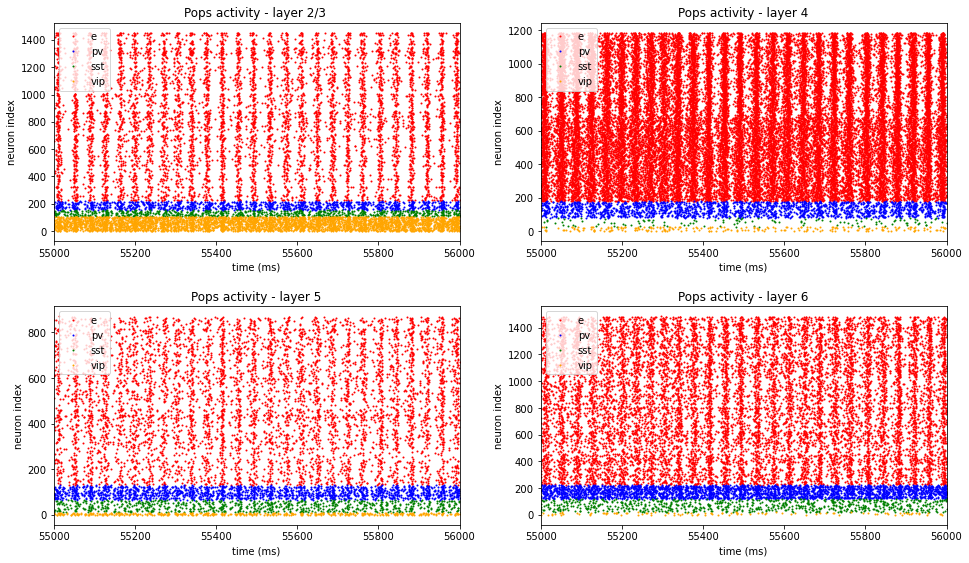

In [7]:
#Which time of the simulation you want to plot
xmin=55.0*1000
xmax=56.0*1000

#I call the function to plot the rasters 
raster_plots(xmin,xmax,N,S_vip1t,
              S_e4t,S_pv4t,S_sst4t,S_vip4t,
              S_e5t,S_pv5t,S_sst5t,S_vip5t,
              S_e6t,S_pv6t,S_sst6t,S_vip6t,
             S_e23t,S_pv23t,S_sst23t,S_vip23t,
                 S_vip1i,S_e4i,S_pv4i,S_sst4i,S_vip4i,
              S_e5i,S_pv5i,S_sst5i,S_vip5i,
              S_e6i,S_pv6i,S_sst6i,S_vip6i,
             S_e23i,S_pv23i,S_sst23i,S_vip23i)


In [8]:
#Function for computation of the firing rates from spikes
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000 #Initial time you want to start computing the rates from (of the total lenght of the simulation time)
    all_time=fin*1000 #Final time you want to finish to compute the rates
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates  

In [9]:
#CALL THE FUNCTION of rates for one population as example
# iniz=55 #Starting time 
# fin=56 #Final time 
# window=200 #Sliding window
# step=1 #step of the sliiding window
# rates_e4=rates(S_e4t,iniz,fin,window,step)
# #Create one plot of the firing rates of the desired layer
# fig = plt.figure(figsize=(6,4))
# plt.plot(rates_e4,color='red', label='E4')
# plt.xlabel('time (ms)')
# plt.ylabel('spikes/s')
# plt.legend()
# plt.title('Pops activity - layer 4')
# plt.show()

In [10]:
#FUNCTION TO PLOT THE RATES ALL IN ONE plot
def rate_plots_myself(runtime,r_vip1,r_e23,r_pv23,r_sst23,r_vip23,
                 r_e4,r_pv4,r_sst4,r_vip4,
                 r_e5,r_pv5,r_sst5,r_vip5,
                 r_e6,r_pv6,r_sst6,r_vip6):
    
    #x-axis values
    time=[i for i in range(0,len(r_e5))]
    print(len(time))
    
    #Layer 1 VIP
    fig = plt.figure(figsize=(6,4))
    plt.plot(time,r_vip1,color='orange', label='vip')
    plt.xlabel('time (ms)')
    plt.ylabel('spikes/s')
    plt.legend()
    plt.title('Pops activity - layer 1')
    plt.show()

    #Create the figure
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,9))
    f.suptitle('N=%sk, G=%s, B=%s'%(int(Ntot/1000),G,nu_ext),fontsize=10)
    #Layers 2/3
    ax1.plot(time, r_e23,color='r', label='e')
    ax1.plot(time, r_pv23,color='b', label='pv')
    ax1.plot(time, r_sst23,color='g', label='sst')
    ax1.plot(time, r_vip23,color='orange', label='vip')
    ax1.legend()
    ax1.set_xlabel('time (ms)')
    ax1.set_ylabel('spikes/s')
    ax1.set_title('Population rates - layer 2/3')
    #Layers 4
    ax2.plot(time, r_e4,color='r', label='e')
    ax2.plot(time, r_pv4,color='b', label='pv')
    ax2.plot(time, r_sst4,color='g', label='sst')
    ax2.plot(time, r_vip4,color='orange', label='vip')
    ax2.set_title('Population rates - layer 4')
    ax2.set_xlabel('time (ms)')
    ax2.set_ylabel('spikes/s')
    ax2.legnd()
    #Layers 5
    ax3.plot(time, r_e5,color='r', label='e')
    ax3.plot(time, r_pv5,color='b', label='pv')
    ax3.plot(time, r_sst5,color='g', label='sst')
    ax3.plot(time, r_vip5,color='orange', label='vip')
    ax3.set_title('Population rates - layer 5')
    ax3.set_xlabel('time (ms)')
    ax3.set_ylabel('spikes/s')
    ax3.legend()
    #Layers 6
    ax4.plot(time, r_e6,color='r', label='e')
    ax4.plot(time, r_pv6,color='b', label='pv')
    ax4.plot(time, r_sst6,color='g', label='sst')
    ax4.plot(time, r_vip6,color='orange', label='vip')
    ax4.set_title('Population rates - layer 6' )
    ax4.set_xlabel('time (ms)')
    ax4.set_ylabel('spikes/s')
    ax4.legend()

    plt.subplots_adjust(left=0.125,
                        bottom=0.125, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.2, 
                        hspace=0.3)              
    plt.show()

In [11]:
# #COMPUTE ALL THE RATES from all the layers and all the groups
# #(It takes some minute to run)
# iniz=55
# fin=56
# window=20
# step=10

# r_vip1= rates(S_vip1t,iniz,fin,window,step)
# r_e23=rates(S_e23t,iniz,fin,window,step)
# r_pv23=rates(S_pv23t,iniz,fin,window,step)
# r_sst23=rates(S_sst23t,iniz,fin,window,step)
# r_vip23=rates(S_vip23t,iniz,fin,window,step)

# r_e4=rates(S_e4t,iniz,fin,window,step)
# r_pv4=rates(S_pv4t,iniz,fin,window,step)
# r_sst4=rates(S_sst4t,iniz,fin,window,step)
# r_vip4=rates(S_vip4t,iniz,fin,window,step)

# r_e5=rates(S_e5t,iniz,fin,window,step)
# r_pv5=rates(S_pv5t,iniz,fin,window,step)
# r_sst5=rates(S_sst5t,iniz,fin,window,step)
# r_vip5=rates(S_vip5t,iniz,fin,window,step)

# r_e6=rates(S_e6t,iniz,fin,window,step)
# r_pv6=rates(S_pv6t,iniz,fin,window,step)
# r_sst6=rates(S_sst6t,iniz,fin,window,step)
# r_vip6=rates(S_vip6t,iniz,fin,window,step)

# #PLOT ALL THE RATES
# rate_plots_myself(runtime,r_vip1,r_e23,r_pv23,r_sst23,r_vip23,
#                  r_e4,r_pv4,r_sst4,r_vip4,
#                  r_e5,r_pv5,r_sst5,r_vip5,
#                  r_e6,r_pv6,r_sst6,r_vip6)

In [12]:
#Function to compute the power spectrum
def power_spectrum(LFP,sec):
    data = LFP
    #print(len(data))
    #le ampiezze non sono relative alle freq in hertz ma al numero di oscillazioni complete nel mio intervallo
    #il primo numero dell'array e' l'ampiezza della frequenza che ci sta una volta (onda che fa 1 giro nell'intervallo), 
    #il secondo numero e' l'ampiezza della frequenza che ci sta due volte (l'onda fa il giro completo 2 volte)
    fourier_transform = np.fft.rfft(data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    #print(fourier_transform[0:100])
    #print(len(fourier_transform)) #Circa meta' della lunghezza della mia time series da analizzare
    #print(len(power_spectrum))
    # x divided by the time in s of my simulation to obtain Hz (sec is given to the function)
    frequency=[x/sec for x in range(0,len(power_spectrum))]

    return frequency, power_spectrum

#Function to plot the power spectrum
def plot_power_spectrum(frequency, power_spectrum):
    fig3 = plt.figure(figsize=(15,7))
    plt.plot(frequency[1:], power_spectrum[1:])
    #plt.yscale('log')
    #plt.xscale('log')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('power spectrum (mv)')
    plt.title('Power spectrum')
    plt.xlim(1,100)

In [13]:
# #As example 
# #I compute the power spectrum and I plot it for one group of cell (excitatory in layer 4)
# freq,power_sp=power_spectrum(rates_e4,1)
# plot_power_spectrum(freq,power_sp)

In [14]:
# #I already computed the following and saved in folder so there is no need to run this, 
#but this is how it was computed and then saved

In [15]:
# #To compute the rates of all excitatory in all the layers for 9 different simulations 
# #In each simulation we increased the input to layer 4: 0pA, 15pA, 20pA, 30pA, 40pA, 50pA, 60pA, 100pA, 150pA)

#initialize array
# r_e23_all_s=[]
# r_e4_all_s=[]
# r_e5_all_s=[]
# r_e6_all_s=[]
# #I upload all the simualtions from the folders
# for i in ['0pA','15pA','20pA','30pA','40pA','50pA','60pA','100pA','150pA']:
#     a='simulations_data/Cont/Spikes_files_'+i #Each folder contains the desired files
    
#     #S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000
    
#     #layer23
#     S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000
# #     S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000
# #     S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000
# #     S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#     #layer4
#     S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000
# #     S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000
# #     S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000
# #     S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#     #layer5
#     S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000
# #     S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000
# #     S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000
# #     S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#     #layer6
#     S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000
# #     S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000
# #     S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000
# #     S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000
    
#     #SELECT THE PART I WANT to compute the rate from 
#     iniz=55
#     fin=56
#     window=200
#     step=1

#     #Here I am computing only the rates of the Excitaoty neurons 
#    # r_vip1= rates(S_vip1t,iniz,fin,window,step)
#     r_e23=rates(S_e23t,iniz,fin,window,step)
# #     r_pv23=rates(S_pv23t,iniz,fin,window,step)
# #     r_sst23=rates(S_sst23t,iniz,fin,window,step)
# #     r_vip23=rates(S_vip23t,iniz,fin,window,step)

#     r_e4=rates(S_e4t,iniz,fin,window,step)
# #     r_pv4=rates(S_pv4t,iniz,fin,window,step)
# #     r_sst4=rates(S_sst4t,iniz,fin,window,step)
# #     r_vip4=rates(S_vip4t,iniz,fin,window,step)

#     r_e5=rates(S_e5t,iniz,fin,window,step)
# #     r_pv5=rates(S_pv5t,iniz,fin,window,step)
# #     r_sst5=rates(S_sst5t,iniz,fin,window,step)
# #     r_vip5=rates(S_vip5t,iniz,fin,window,step)

#     r_e6=rates(S_e6t,iniz,fin,window,step)
# #     r_pv6=rates(S_pv6t,iniz,fin,window,step)
# #     r_sst6=rates(S_sst6t,iniz,fin,window,step)
# #     r_vip6=rates(S_vip6t,iniz,fin,window,step)
    
#     #I append the values in an array, it contains the rates of each of the simulations 
#     r_e23_all_s.append(r_e23)
#     r_e4_all_s.append(r_e4)
#     r_e5_all_s.append(r_e5)
#     r_e6_all_s.append(r_e6)

In [16]:
# #I save the rates in a folder, in the correct one depending on what I computed 
# #save_folder='rate_200_1'
# #save_folder='rate_200_1_1sec'
# save_folder='rate_1_1_3sec'
# np.save('simulations_data/RATE_FILE_SAVED/input_e4/'+save_folder+'/r_e23_all', r_e23_all_s)
# np.save('simulations_data/RATE_FILE_SAVED/input_e4/'+save_folder+'/r_e4_all', r_e4_all_s)
# np.save('simulations_data/RATE_FILE_SAVED/input_e4/'+save_folder+'/r_e5_all', r_e5_all_s)
# np.save('simulations_data/RATE_FILE_SAVED/input_e4/'+save_folder+'/r_e6_all', r_e6_all_s)

In [17]:
#TO UPLOAD THE COMPUTED RATES

In [18]:
#Folder containing the info I need  
#saved_folder='rate_200_1' #this is 3 seconds of simulations (200ms windows, 1ms step)
saved_folder='rate_200_1_1sec' #this is 1 second of simulations (200ms windows, 1ms step)
#saved_folder='rate_1_1_3sec' #this is 3 seconds of simulations (1ms windows, 1ms step)

#I UPLOAD THE SAVED FOLDERS
r_e23_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e23_all.npy')
r_e4_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e4_all.npy')
r_e5_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e5_all.npy')
r_e6_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e6_all.npy')

Text(0.5, 1.0, 'Population rates - layer 6')

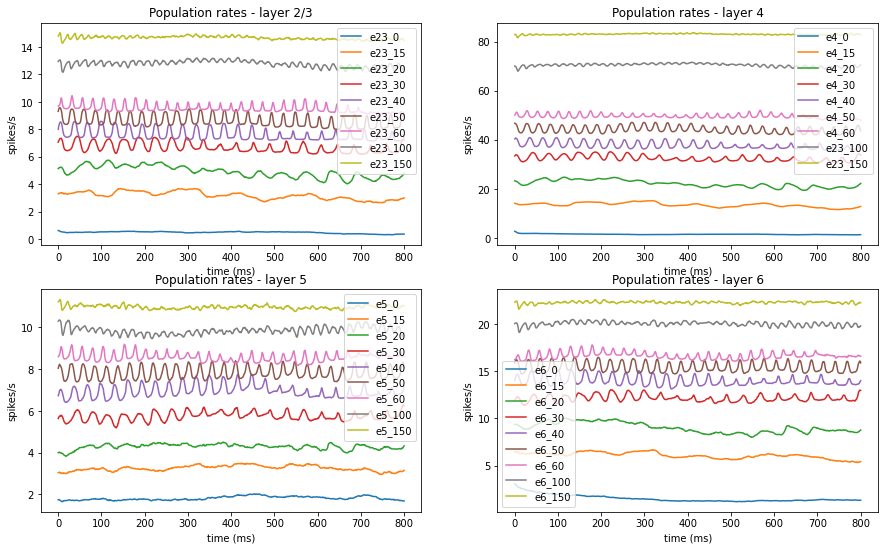

In [19]:
#Create the figure with the values for the different simulations
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,9))

#E2/3 for the different simulations 
ax1.plot( r_e23_all[0], label='e23_0')
ax1.plot( r_e23_all[1], label='e23_15')
ax1.plot( r_e23_all[2], label='e23_20')
ax1.plot( r_e23_all[3], label='e23_30')
ax1.plot( r_e23_all[4], label='e23_40')
ax1.plot( r_e23_all[5], label='e23_50')
ax1.plot( r_e23_all[6], label='e23_60')
ax1.plot( r_e23_all[7], label='e23_100')
ax1.plot( r_e23_all[8], label='e23_150')

ax1.legend()
ax1.set_xlabel('time (ms)')
#ax1.set_xlim(300,800)
#ax1.set_ylim(0,3)
ax1.set_ylabel('spikes/s')
ax1.set_title('Population rates - layer 2/3')

#E4
ax2.plot( r_e4_all[0], label='e4_0')
ax2.plot( r_e4_all[1], label='e4_15')
ax2.plot( r_e4_all[2], label='e4_20')
ax2.plot( r_e4_all[3], label='e4_30')
ax2.plot( r_e4_all[4], label='e4_40')
ax2.plot( r_e4_all[5], label='e4_50')
ax2.plot( r_e4_all[6], label='e4_60')
ax2.plot( r_e4_all[7], label='e23_100')
ax2.plot( r_e4_all[8], label='e23_150')

ax2.legend()
ax2.set_xlabel('time (ms)')
#ax1.set_xlim(300,800)
#ax1.set_ylim(0,3)
ax2.set_ylabel('spikes/s')
ax2.set_title('Population rates - layer 4')

#E5
ax3.plot( r_e5_all[0], label='e5_0')
ax3.plot( r_e5_all[1], label='e5_15')
ax3.plot( r_e5_all[2], label='e5_20')
ax3.plot( r_e5_all[3], label='e5_30')
ax3.plot( r_e5_all[4], label='e5_40')
ax3.plot( r_e5_all[5], label='e5_50')
ax3.plot( r_e5_all[6], label='e5_60')
ax3.plot( r_e5_all[7], label='e5_100')
ax3.plot( r_e5_all[8], label='e5_150')

ax3.legend()
ax3.set_xlabel('time (ms)')
#ax1.set_xlim(300,800)
#ax1.set_ylim(0,3)
ax3.set_ylabel('spikes/s')
ax3.set_title('Population rates - layer 5')

#E6
ax4.plot( r_e6_all[0], label='e6_0')
ax4.plot( r_e6_all[1], label='e6_15')
ax4.plot( r_e6_all[2], label='e6_20')
ax4.plot( r_e6_all[3], label='e6_30')
ax4.plot( r_e6_all[4], label='e6_40')
ax4.plot( r_e6_all[5], label='e6_50')
ax4.plot( r_e6_all[6], label='e6_60')
ax4.plot( r_e6_all[7], label='e6_100')
ax4.plot( r_e6_all[8], label='e6_150')

ax4.legend()
ax4.set_xlabel('time (ms)')
#ax1.set_xlim(300,800)
#ax1.set_ylim(0,3)
ax4.set_ylabel('spikes/s')
ax4.set_title('Population rates - layer 6')

In [51]:
#Fig 5A: Firing rates of excitatory neurons in layer 4, each color represents a simulation with a different input strength (input to L4).

<ipython-input-20-1d41088576fb>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(labs)


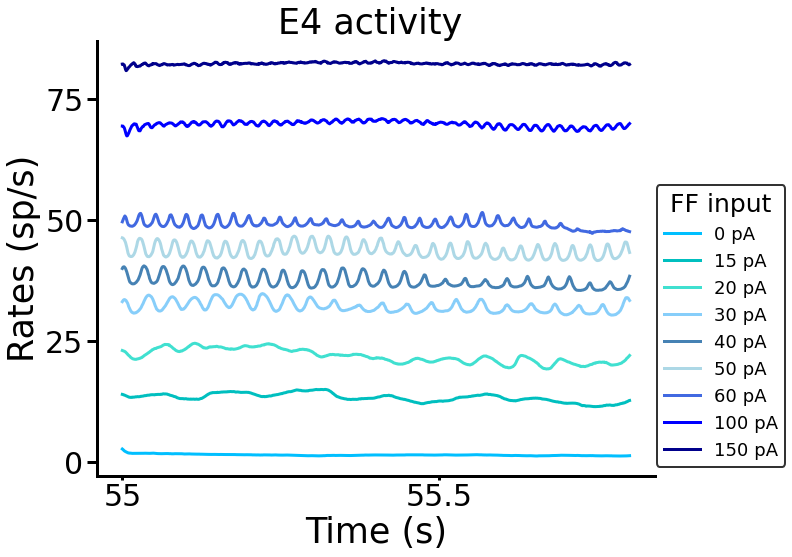

In [20]:
values=[0,1,2,3,4,5,6,7,8]
#Lables and colors 
labels=['0 pA','15 pA','20 pA','30 pA','40 pA','50 pA','60 pA','100 pA','150 pA']
colors=['darkblue','blue','royalblue','lightblue','steelblue','lightskyblue','turquoise','c','deepskyblue']

j=0
#Create the figure and plot all the E4
fig, ax = plt.subplots(figsize=(10,8))
for i in values:
    plt.plot(r_e4_all[i]*1000/N[1][0],linewidth=3, label=labels[i],color=colors[8-j])
    j+=1

#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3,tickdir='out',length=10)
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=3)
plt.ylabel('Rates (sp/s)',size=35)
plt.xlabel('Time (s)', size=35)
plt.title('E4 activity ',size=35)
#Label x axis
labs= ['0','55','55.5','56']
ax.xaxis.set_ticklabels(labs)

#plt.legend(loc='lower right',fontsize=15)
l1=plt.legend(loc='lower right',bbox_to_anchor=(1.25, 0.),title="FF input", fontsize=18, title_fontsize=25)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Save fig
plt.savefig('IMAGES/Fig5A_Inpu4_rates.png', bbox_inches='tight')
#Show fig
plt.show()

In [58]:
#Now I compute the power spectrum 

In [21]:
#The following analysis should be done with the rates of 
saved_folder='rate_1_1_3sec' #this is 3 seconds of simulations (1ms windows, 1ms step)

#I UPLOAD THE SAVED FOLDERS
r_e23_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e23_all.npy')
r_e4_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e4_all.npy')
r_e5_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e5_all.npy')
r_e6_all=np.load('simulations_data/RATE_FILE_SAVED/input_e4/'+saved_folder+'/r_e6_all.npy')

In [22]:
sec=3 #seconds of simulations analysed
#Compute the power spectrum for all the simulations (each simulation has a different input strenght to E4)
#Layer 2/3
freq0,power_sp0=power_spectrum(r_e23_all[0],sec)
freq15,power_sp15=power_spectrum(r_e23_all[1],sec)
freq20,power_sp20=power_spectrum(r_e23_all[2],sec)
freq30,power_sp30=power_spectrum(r_e23_all[3],sec)
freq40,power_sp40=power_spectrum(r_e23_all[4],sec)
freq50,power_sp50=power_spectrum(r_e23_all[5],sec)
freq60,power_sp60=power_spectrum(r_e23_all[6],sec)
freq100,power_sp100=power_spectrum(r_e23_all[7],sec)
freq150,power_sp150=power_spectrum(r_e23_all[8],sec)
#Layer 4
freq0_4,power_sp0_4=power_spectrum(r_e4_all[0],sec)
freq15_4,power_sp15_4=power_spectrum(r_e4_all[1],sec)
freq20_4,power_sp20_4=power_spectrum(r_e4_all[2],sec)
freq30_4,power_sp30_4=power_spectrum(r_e4_all[3],sec)
freq40_4,power_sp40_4=power_spectrum(r_e4_all[4],sec)
freq50_4,power_sp50_4=power_spectrum(r_e4_all[5],sec)
freq60_4,power_sp60_4=power_spectrum(r_e4_all[6],sec)
freq100_4,power_sp100_4=power_spectrum(r_e4_all[7],sec)
freq150_4,power_sp150_4=power_spectrum(r_e4_all[8],sec)
#Layer 5
freq0_5,power_sp0_5=power_spectrum(r_e5_all[0],sec)
freq15_5,power_sp15_5=power_spectrum(r_e5_all[1],sec)
freq20_5,power_sp20_5=power_spectrum(r_e5_all[2],sec)
freq30_5,power_sp30_5=power_spectrum(r_e5_all[3],sec)
freq40_5,power_sp40_5=power_spectrum(r_e5_all[4],sec)
freq50_5,power_sp50_5=power_spectrum(r_e5_all[5],sec)
freq60_5,power_sp60_5=power_spectrum(r_e5_all[6],sec)
freq100_5,power_sp100_5=power_spectrum(r_e5_all[7],sec)
freq150_5,power_sp150_5=power_spectrum(r_e5_all[8],sec)
#Layer 6
freq0_6,power_sp0_6=power_spectrum(r_e6_all[0],sec)
freq15_6,power_sp15_6=power_spectrum(r_e6_all[1],sec)
freq20_6,power_sp20_6=power_spectrum(r_e6_all[2],sec)
freq30_6,power_sp30_6=power_spectrum(r_e6_all[3],sec)
freq40_6,power_sp40_6=power_spectrum(r_e6_all[4],sec)
freq50_6,power_sp50_6=power_spectrum(r_e6_all[5],sec)
freq60_6,power_sp60_6=power_spectrum(r_e6_all[6],sec)
freq100_6,power_sp100_6=power_spectrum(r_e6_all[7],sec)
freq150_6,power_sp150_6=power_spectrum(r_e6_all[8],sec)

In [23]:
#Supplementary figure
#Power spectrum of the different simulations for E2/3

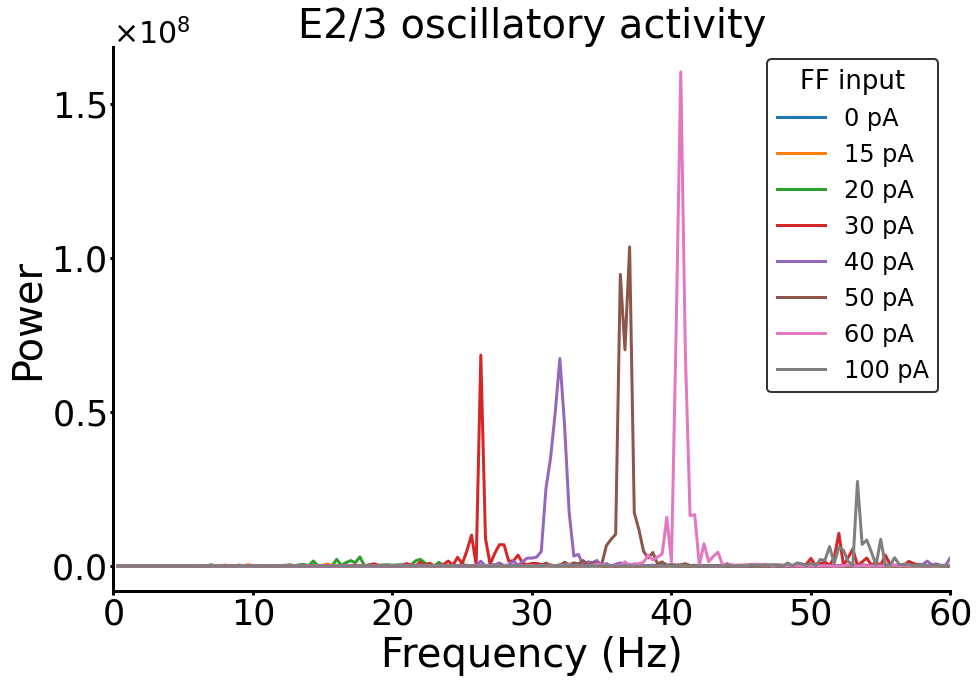

In [24]:
#POWER SPECTRUM OF excitatory neurons for the different simulations (more input to E4)
#For excitatory in layer 2/3 
fig3,ax = plt.subplots(figsize=(15,10))
plt.plot(freq0[1:], power_sp0[1:],linewidth=3,label='0 pA')
plt.plot(freq15[1:], power_sp15[1:],linewidth=3,label='15 pA')
plt.plot(freq20[1:], power_sp20[1:],linewidth=3,label='20 pA')
plt.plot(freq30[1:], power_sp30[1:],linewidth=3,label='30 pA')
plt.plot(freq40[1:], power_sp40[1:],linewidth=3,label='40 pA')
plt.plot(freq50[1:], power_sp50[1:],linewidth=3,label='50 pA')
plt.plot(freq60[1:], power_sp60[1:],linewidth=3,label='60 pA')
plt.plot(freq100[1:], power_sp100[1:],linewidth=3,label='100 pA')
#plt.plot(freq150[1:], power_sp150[1:],linewidth=3,label='e23_150')


#l1=plt.legend(loc='lower right',bbox_to_anchor=(1.2, 0.),title="FF input", fontsize=18, title_fontsize=25)
l1=plt.legend(loc='best',title="FF input", fontsize=24, title_fontsize=26)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Layout and labels, ticks size
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
plt.xticks(size=35)
plt.yticks(size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='y', nbins=5)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=None, useLocale=None, useMathText=True)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_size(30)  # Adjust the font size of exponent as desired

plt.title('E2/3 oscillatory activity',fontsize=40)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.xlim(0,60)
#plt.ylim(0,10**8)

#save fig
plt.savefig('IMAGES/Fig_SUPP_peaks_powerSP_FFinput.png')
#show fig 
plt.show()

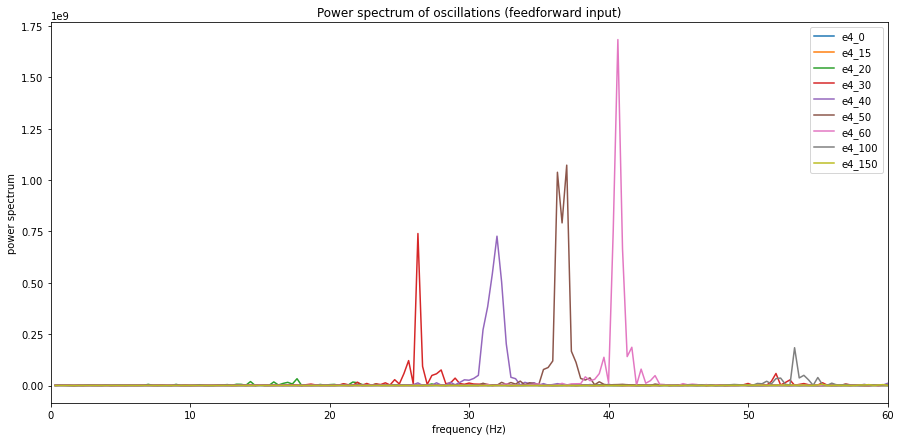

In [25]:
#For Excitatatory in layer 4 for the different simulations 
fig3 = plt.figure(figsize=(15,7))
plt.plot(freq0_4[1:], power_sp0_4[1:],label='e4_0')
plt.plot(freq15_4[1:], power_sp15_4[1:],label='e4_15')
plt.plot(freq20_4[1:], power_sp20_4[1:],label='e4_20')
plt.plot(freq30_4[1:], power_sp30_4[1:],label='e4_30')
plt.plot(freq40_4[1:], power_sp40_4[1:],label='e4_40')
plt.plot(freq50_4[1:], power_sp50_4[1:],label='e4_50')
plt.plot(freq60_4[1:], power_sp60_4[1:],label='e4_60')
plt.plot(freq100_4[1:], power_sp100_4[1:],label='e4_100')
plt.plot(freq150_4[1:], power_sp150_4[1:],label='e4_150')
plt.legend()
plt.xlabel('frequency (Hz)')
plt.ylabel('power spectrum')
plt.title('Power spectrum of oscillations (feedforward input)')
plt.xlim(0,60)
#plt.ylim(0,1*10**5)
plt.show()

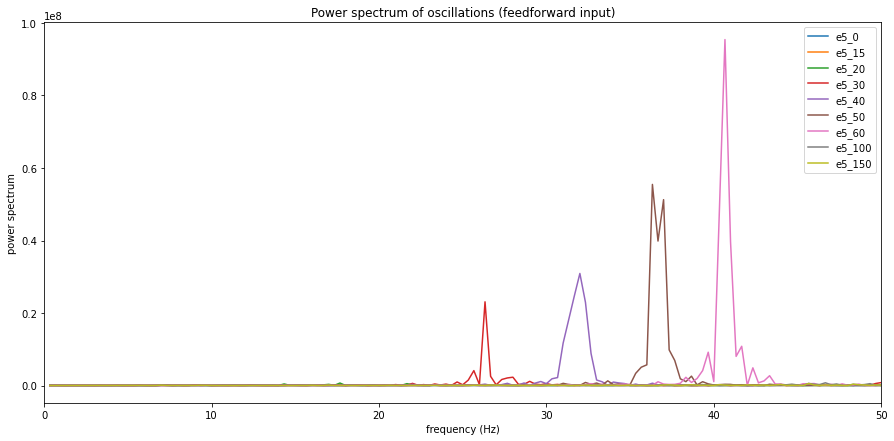

In [26]:
#For Excitatatory in layer 5 for the different simulations 
fig3 = plt.figure(figsize=(15,7))
plt.plot(freq0_5[1:], power_sp0_5[1:],label='e5_0')
plt.plot(freq15_5[1:], power_sp15_5[1:],label='e5_15')
plt.plot(freq20_5[1:], power_sp20_5[1:],label='e5_20')
plt.plot(freq30_5[1:], power_sp30_5[1:],label='e5_30')
plt.plot(freq40_5[1:], power_sp40_5[1:],label='e5_40')
plt.plot(freq50_5[1:], power_sp50_5[1:],label='e5_50')
plt.plot(freq60_5[1:], power_sp60_5[1:],label='e5_60')
plt.plot(freq100_5[1:], power_sp100_5[1:],label='e5_100')
plt.plot(freq150_5[1:], power_sp150_5[1:],label='e5_150')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('frequency (Hz)')
plt.ylabel('power spectrum')
plt.title('Power spectrum of oscillations (feedforward input)')
plt.xlim(0,50)
#plt.xlim(0,15)
#plt.ylim(0,1*10**5)
plt.legend()
plt.show()

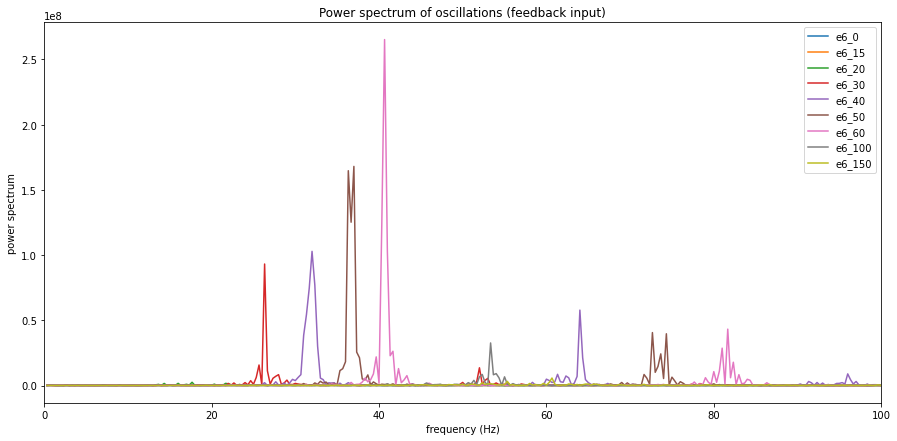

In [27]:
#For Excitatatory in layer 6 for the different simulations 
fig3 = plt.figure(figsize=(15,7))
plt.plot(freq0_6[1:], power_sp0_6[1:],label='e6_0')
plt.plot(freq15_6[1:], power_sp15_6[1:],label='e6_15')
plt.plot(freq20_6[1:], power_sp20_6[1:],label='e6_20')
plt.plot(freq30_6[1:], power_sp30_6[1:],label='e6_30')
plt.plot(freq40_6[1:], power_sp40_6[1:],label='e6_40')
plt.plot(freq50_6[1:], power_sp50_6[1:],label='e6_50')
plt.plot(freq60_6[1:], power_sp60_6[1:],label='e6_60')
plt.plot(freq100_6[1:], power_sp100_6[1:],label='e6_100')
plt.plot(freq150_6[1:], power_sp150_6[1:],label='e6_150')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('frequency (Hz)')
plt.ylabel('power spectrum')
plt.title('Power spectrum of oscillations (feedback input)')
plt.xlim(0,100)
#plt.ylim(0,1*10**5)
plt.legend()
plt.show()

In [28]:
#FUNCTION TO FIND frequency where the power is maximum  
#INIZ is WHERE I START CHECKING 
#THRESHOLD IS IMPORTANT
def find_freq(power_sp,freq,threshold):
    print('----')
    iniz=1 #FREQ FROM WHERE I START CHECKING 
    index_iniz=np.where(np.array(freq) == iniz)[0][0]# index FREQ FROM WHERE I START CHECKING 
    print('index iniz')
    print(index_iniz)
    max_index = np.argmax(power_sp[index_iniz:], axis=0)
    #print(max_index)
    print('freq des:')
    freq_desired=freq[max_index+index_iniz]
    print(freq_desired)
    
    if freq_desired > 70: #I put this based on the previuos plot where I see no true first peaks after 60
        print('more than 1 freq')
        index_60=np.where(np.array(freq) == 60)[0][0] #GIVE ME THE INDEX 
        max_index = np.argmax(power_sp[index_iniz:index_60], axis=0)
        print('new max index')
        print(max_index)
        freq_desired=freq[max_index+index_iniz]
        print('new freq des')
        print(freq_desired)
        
    if freq_desired < 2: #Less than 2 Hz I think is an artefact of the power computation
        print('Less than 2 Hz')
        index_2=np.where(np.array(freq) == 2)[0][0] #GIVE ME THE INDEX 
        max_index = np.argmax(power_sp[index_2:], axis=0)
        print('new max index')
        print(max_index)
        freq_desired=freq[max_index+index_iniz]
        print('new freq des')
        print(freq_desired)
        
    if power_sp[max_index+index_iniz] < threshold: #If the power is too low I classify it as NON-significant, I put 0 Hz
        print('power not significant')
        freq_desired=0

    return freq_desired

In [29]:
th=90000
print('------------LAYER 2/3------------')
f0=find_freq(power_sp0,freq0,th)
f15=find_freq(power_sp15,freq15,th)
f20=find_freq(power_sp20,freq20,th)
f30=find_freq(power_sp30,freq30,th)
f40=find_freq(power_sp40,freq40,th)
f50=find_freq(power_sp50,freq50,th)


f60=find_freq(power_sp60,freq60,th)
f100=find_freq(power_sp100,freq100,th)
f150=find_freq(power_sp150,freq150,th)

f=[f0,f15,f20,f30,f40,f50,f60,f100,f150]

print('------------LAYER 4------------')
f0_4=find_freq(power_sp0_4,freq0_4,th)
f15_4=find_freq(power_sp15_4,freq15_4,th)
f20_4=find_freq(power_sp20_4,freq20_4,th)
f30_4=find_freq(power_sp30_4,freq30_4,th)
f40_4=find_freq(power_sp40_4,freq40_4,th)
f50_4=find_freq(power_sp50_4,freq50_4,th)
f60_4=find_freq(power_sp60_4,freq60_4,th)
f100_4=find_freq(power_sp100_4,freq100_4,th)
f150_4=find_freq(power_sp150_4,freq150_4,th)

f_4=[f0_4,f15_4,f20_4,f30_4,f40_4,f50_4,f60_4,f100_4,f150_4]

print('------------LAYER 5------------')
f0_5=find_freq(power_sp0_5,freq0_5,th)
f15_5=find_freq(power_sp15_5,freq15_5,th)
f20_5=find_freq(power_sp20_5,freq20_5,th)
f30_5=find_freq(power_sp30_5,freq30_5,th)
f40_5=find_freq(power_sp40_5,freq40_5,th)
f50_5=find_freq(power_sp50_5,freq50_5,th)
f60_5=find_freq(power_sp60_5,freq60_5,th)
f100_5=find_freq(power_sp100_5,freq100_5,th)
f150_5=find_freq(power_sp150_5,freq150_5,th)

f_5=[f0_5,f15_5,f20_5,f30_5,f40_5,f50_5,f60_5,f100_5,f150_5]

print('------------LAYER 6------------')
f0_6=find_freq(power_sp0_6,freq0_6,th)
f15_6=find_freq(power_sp15_6,freq15_6,th)
f20_6=find_freq(power_sp20_6,freq20_6,th)
f30_6=find_freq(power_sp30_6,freq30_6,th)
f40_6=find_freq(power_sp40_6,freq40_6,th)
f50_6=find_freq(power_sp50_6,freq50_6,th)
f60_6=find_freq(power_sp60_6,freq60_6,th)
f100_6=find_freq(power_sp100_6,freq100_6,th)
f150_6=find_freq(power_sp150_6,freq150_6,th)

f_6=[f0_6,f15_6,f20_6,f30_6,f40_6,f50_6,f60_6,f100_6,f150_6]

------------LAYER 2/3------------
----
index iniz
3
freq des:
205.33333333333334
more than 1 freq
new max index
120
new freq des
41.0
power not significant
----
index iniz
3
freq des:
15.333333333333334
----
index iniz
3
freq des:
17.666666666666668
----
index iniz
3
freq des:
26.333333333333332
----
index iniz
3
freq des:
32.0
----
index iniz
3
freq des:
37.0
----
index iniz
3
freq des:
40.666666666666664
----
index iniz
3
freq des:
53.333333333333336
----
index iniz
3
freq des:
60.666666666666664
------------LAYER 4------------
----
index iniz
3
freq des:
3.3333333333333335
----
index iniz
3
freq des:
14.333333333333334
----
index iniz
3
freq des:
17.666666666666668
----
index iniz
3
freq des:
26.333333333333332
----
index iniz
3
freq des:
32.0
----
index iniz
3
freq des:
37.0
----
index iniz
3
freq des:
40.666666666666664
----
index iniz
3
freq des:
53.333333333333336
----
index iniz
3
freq des:
60.666666666666664
------------LAYER 5------------
----
index iniz
3
freq des:
349.0
mor

In [72]:
#Fig 5B: Frequency of firing rate of excitatory neurons in all layers as a function of input strength to layer 4. 

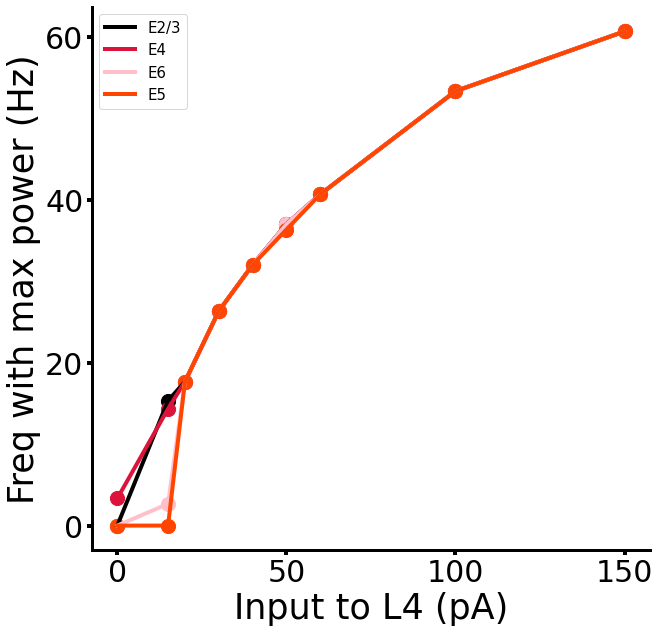

In [30]:
#Create the figure with the maximal power 
fig , ax = plt.subplots(figsize=(10,10))

Input=[0,15,20,30,40,50,60,100,150] #X axis 

#plot data 
plt.scatter(Input,f, s=200,color='k')
plt.plot(Input,f,linewidth=4,  label='E2/3',color='k')

plt.scatter(Input,f_4, s=200, color='crimson')
plt.plot(Input,f_4,linewidth=4, label='E4', color='crimson')

plt.scatter(Input,f_6, s=200,color='pink')
plt.plot(Input,f_6,linewidth=4, label='E6',color='pink')

plt.scatter(Input,f_5, s=200,color='orangered')
plt.plot(Input,f_5,linewidth=4, label='E5',color='orangered')


#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
plt.xticks(size=30)
plt.yticks(size=30)
ax.xaxis.set_tick_params(width=4,length=5)
ax.yaxis.set_tick_params(width=4,length=5)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=4)

plt.xlabel('Input to L4 (pA)',size=35)
plt.ylabel('Freq with max power (Hz)',size=35)
#plt.title('freq with max power',size=15)
plt.legend(fontsize=15)

#Save fig
plt.savefig('IMAGES/Fig5B_freq_inp4.png')
# Show graphic
plt.show()

In [31]:
# Compute the maximum power of the previous plot
iniz_fre=1 #FREQ FROM WHERE I START CHECKING (IT HAS TO BE THE SAME AS BEFORE)
iniz=np.where(np.array(freq0) == iniz_fre)[0][0]
#print(iniz)
#Layer 2/3
m0=np.max(power_sp0[iniz:])
m1=np.max(power_sp15[iniz:])
m2=np.max(power_sp20[iniz:])
m3=np.max(power_sp30[iniz:])
m4=np.max(power_sp40[iniz:])
m5=np.max(power_sp50[iniz:])
m6=np.max(power_sp60[iniz:])
m7=np.max(power_sp100[iniz:])
m8=np.max(power_sp150[iniz:])
maxes_23=[m0,m1,m2,m3,m4,m5,m6,m7,m8] #I put them all in 1 array
#print(maxes_23)
#Layer 4
m0_4=np.max(power_sp0_4[iniz:])
m1_4=np.max(power_sp15_4[iniz:])
m2_4=np.max(power_sp20_4[iniz:])
m3_4=np.max(power_sp30_4[iniz:])
m4_4=np.max(power_sp40_4[iniz:])
m5_4=np.max(power_sp50_4[iniz:])
m6_4=np.max(power_sp60_4[iniz:])
m7_4=np.max(power_sp100_4[iniz:])
m8_4=np.max(power_sp150_4[iniz:])
maxes_4=[m0_4,m1_4,m2_4,m3_4,m4_4,m5_4,m6_4,m7_4,m8_4]
#Layer 5
m0_5=np.max(power_sp0_5[iniz:])
m1_5=np.max(power_sp15_5[iniz:])
m2_5=np.max(power_sp20_5[iniz:])
m3_5=np.max(power_sp30_5[iniz:])
m4_5=np.max(power_sp30_5[iniz:])
m5_5=np.max(power_sp30_5[iniz:])
m6_5=np.max(power_sp60_5[iniz:])
m7_5=np.max(power_sp100_5[iniz:])
m8_5=np.max(power_sp150_5[iniz:])
maxes_5=[m0_5,m1_5,m2_5,m3_5,m4_5,m5_5,m6_5,m7_5,m8_5]
#Layer 6
m0_6=np.max(power_sp0_6[iniz:])
m1_6=np.max(power_sp15_6[iniz:])
m2_6=np.max(power_sp20_6[iniz:])
m3_6=np.max(power_sp30_6[iniz:])
m4_6=np.max(power_sp40_6[iniz:])
m5_6=np.max(power_sp50_6[iniz:])
m6_6=np.max(power_sp60_6[iniz:])
m7_6=np.max(power_sp100_6[iniz:])
m8_6=np.max(power_sp150_6[iniz:])
maxes_6=[m0_6,m1_6,m2_6,m3_6,m4_6,m5_6,m6_6,m7_6,m8_6]
#print(maxes_23)

In [32]:
#Fig 5C: Maximal power of ocillations as a function of input strength to layer 4

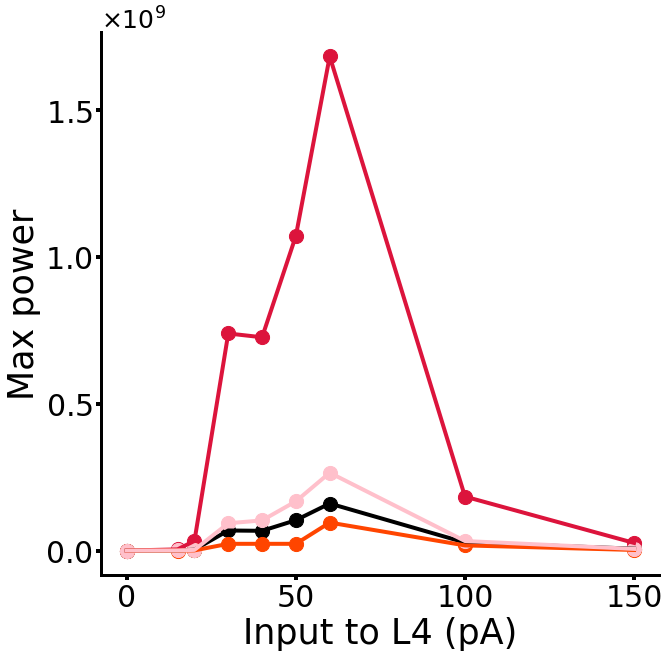

In [34]:
#Create the figure
fig4,ax = plt.subplots(figsize=(10,10))
Input=[0,15,20,30,40,50,60,100,150] #x axis 

#plot data 
plt.scatter(Input,maxes_23, s=200,color='k')
plt.plot(Input,maxes_23,linewidth=4,  label='E2/3',color='k')

plt.scatter(Input,maxes_4, s=200, color='crimson')
plt.plot(Input,maxes_4,linewidth=4,  label='E4', color='crimson')

plt.scatter(Input,maxes_5, s=200,color='orangered')
plt.plot(Input,maxes_5,linewidth=4,  label='E5',color='orangered')

plt.scatter(Input,maxes_6, s=200,color='pink')
plt.plot(Input,maxes_6,linewidth=4,  label='E6',color='pink')

#Layout 
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
plt.xticks(size=30)
plt.yticks(size=30)
ax.xaxis.set_tick_params(width=4,length=5)
ax.yaxis.set_tick_params(width=4,length=5)
plt.locator_params(axis='x', nbins=5) #how many ticks 
plt.locator_params(axis='y', nbins=4)
#plt.legend(fontsize=15,loc='upper left')
plt.xlabel('Input to L4 (pA)',size=35)
plt.ylabel('Max power',size=35)
#plt.title('Max power excitatory spectrum',size=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=None, useLocale=None, useMathText=True)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_size(25)  # Adjust the font size of exponent as desired

#Save fig
plt.savefig('IMAGES/Fig5C_maxPw_inp.png')
#Show fig
plt.show()